#Configuração de ambiente



In [ ]:
!pip install gdown


Download do arquivo pelo link disponibilizado no Drive

In [ ]:
!gdown --id '1jKHn7EGZMeSlN-TBMqBV0wTaic2ToJmL'


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jKHn7EGZMeSlN-TBMqBV0wTaic2ToJmL
To: /content/bd_limpo.csv
100% 89.9M/89.9M [00:01<00:00, 61.9MB/s]


#Importação do pandas e leitura do arquivo.

In [ ]:
import pandas as pd

# Substitua 'nome_do_arquivo.tsv' pelo nome do seu arquivo
data = pd.read_csv('/content/bd_limpo.csv')
data.head()  # Isso exibirá as primeiras 5 linhas do arquivo


<ipython-input-3-6d0a9041790f>:4: DtypeWarning: Columns (0,4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/bd_limpo.csv')


,GR/GPB,Emissão GPB,Data da Baixa,Baixa,Qtde.,Material,Item,Diretoria,CIE,Escola,Data de entrega,Classe do Material,Fornecedor,0
0,1430636,1/7/2017,15/02/2022,Sim,2,CAIXA PARA ACONDICIONAMENTO DE LÂMPADAS,Tipo 1 - Caixa para acondicionamento de lâmpad...,ADAMANTINA,31264,9 DE JULHO,NaN,Outros Materiais de Consumo,INDÚSTRIA E COMÉRCIO ELETRO ELETRÔNICA GEHAKA ...,0.0
1,1430637,1/7/2017,1/8/2017,Sim,2,CAIXA PARA ACONDICIONAMENTO DE LÂMPADAS,Tipo 1 - Caixa para acondicionamento de lâmpad...,ADAMANTINA,20901,ADAMANTINA,NaN,Outros Materiais de Consumo,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
2,1447250,22/10/2018,Não,Não,20,CAIXA PARA ACONDICIONAMENTO DE LÂMPADAS,Tipo 2 - Caixa para acondicionamento de lâmpad...,ADAMANTINA,20901,ADAMANTINA,NaN,Outros Materiais de Consumo,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
3,1430638,1/7/2017,31/01/2019,Sim,1,CAIXA PARA ACONDICIONAMENTO DE LÂMPADAS,Tipo 2 - Caixa para acondicionamento de lâmpad...,ADAMANTINA,31636,DOM BOSCO,NaN,Outros Materiais de Consumo,MARIA IGNEZ SCROCCA ELETROELETRONICOS ME,0.0
4,1434220,28/09/2017,Não,Não,1,CAIXA PARA ACONDICIONAMENTO DE LÂMPADAS,Tipo 1 - Caixa para acondicionamento de lâmpad...,ADAMANTINA,30892,ELMOZA ANTONIO JOAO PROFA,NaN,Outros Materiais de Consumo,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,0.0


Nomes das colunas:

In [ ]:
for col in data.columns:
  print(col)

GR/GPB
Emissão GPB
Data da Baixa
Baixa
Qtde.
Material
Item
Diretoria
CIE
Escola
Data de entrega
Classe do Material
Fornecedor
0


Renomeia a coluna de avaliação.

In [ ]:
data.rename(columns = {'0': 'Avaliação'}, inplace = True)

Limpa os dados, restando apenas colunas de importância para a nossa análise de relação entre Escolas e Fornecedoras.

In [ ]:
data_clean = data[['GR/GPB', 'CIE', 'Escola', 'Fornecedor', 'Avaliação']]
data_clean.head()

,GR/GPB,CIE,Escola,Fornecedor,Avaliação
0,1430636,31264,9 DE JULHO,INDÚSTRIA E COMÉRCIO ELETRO ELETRÔNICA GEHAKA ...,0.0
1,1430637,20901,ADAMANTINA,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
2,1447250,20901,ADAMANTINA,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,5.0
3,1430638,31636,DOM BOSCO,MARIA IGNEZ SCROCCA ELETROELETRONICOS ME,0.0
4,1434220,30892,ELMOZA ANTONIO JOAO PROFA,PROVISÃO JC COMÉRCIO DE ELETRO ELETRÔNICOS LTDA -,0.0


Tamanho da tabela.

In [ ]:
data_clean.shape

(459519, 5)

Contagem de valores distintos

In [ ]:
data_clean.nunique()

GR/GPB        366422
CIE            11403
Escola         10707
Fornecedor       101
Avaliação          6
dtype: int64

Checar distribuição de avaliações por escola:


In [ ]:
contagem_escolas = data_clean['Escola'].value_counts().rename_axis('Escola').to_frame('Contagem').reset_index()
contagem_escolas

,Escola,Contagem
0,MARIA DE LOURDES ALMEIDA SINISGALLI PROFA,2598
1,JOAQUIM ALVARES CRUZ PROF,2437
2,HILTON REIS SANTOS PROF,1641
3,ADRIAO BERNARDES PROF,1634
4,JOSE STOROPOLI DEPUTADO,1138
...,...,...
10702,919305,1
10703,19800,1
10704,46528,1
10705,19768,1


In [ ]:
# Estatísticas descritivas
contagem_escolas.describe()

,Contagem
count,10707.000000
mean,42.527599
std,66.286204
min,1.000000
25%,3.000000
50%,13.000000
75%,78.000000
max,2598.000000



Observamos que a escola média possui cerca de 42 avaliações, enquanto que a mediana possui 13 avaliações. Existem algumas escolas outliers, como a escola "MARIA DE LOURDES ALMEIDA SINISGALLI PROFA", que aparece mais de 2500 vezes na base.

Vemos então que a base não está uniformemente distribuída entre as escolas (não balanceada em termos de representatividade das escolas).



In [ ]:
data_clean[['Escola', 'Fornecedor']].query('Escola=="MARIA DE LOURDES ALMEIDA SINISGALLI PROFA"').value_counts()

Escola                                     Fornecedor                                               
MARIA DE LOURDES ALMEIDA SINISGALLI PROFA  AGUAMAR TRANSPORTES LTDA                                     651
                                           ARMAZENA ARMAZENS GERAIS LTDA                                634
                                           ELVI COZINHAS INDUSTRIAIS LTDA                               419
                                           COZIL EQUIPAMENTOS INDUSTRIAIS LTDA.                         416
                                           R V CONSULT TRANSPORTES E LOGÍSTICA LTDA.                    412
                                           ESDEVA - INDUSTRIA GRÁFICA S/A                                 9
                                           BRINK MOBIL EQUIPAMENTOS EDUCACIONAIS LTDA                     8
                                           SISMAR COMÉRCIO DE COMPUTADORES LTDA. - EPP                    3
                                   

Agora, checamos a distribuição de avaliações por Fornecedor:

In [ ]:
contagem_fornecedores = data_clean['Fornecedor'].value_counts().rename_axis('Fornecedor').to_frame('Contagem').reset_index()
contagem_fornecedores

,Fornecedor,Contagem
0,RIO OFFICE COMÉRCIO DE MOVEIS E EQUIPAMENTOS E...,16721
1,COZIL EQUIPAMENTOS INDUSTRIAIS LTDA.,11715
2,R V CONSULT TRANSPORTES E LOGÍSTICA LTDA.,11467
3,ELVI COZINHAS INDUSTRIAIS LTDA,11377
4,GELOPAR REFRIGERAÇÃO PARANAENSE LTDA.,7588
...,...,...
96,GNATUS EQUIPAMENTOS MÉDICO ONDONTOLÓGICOS LTDA,217
97,PRECISÃO ABSOLUTA BALANÇAS LTDA. ME,75
98,BPN COMERCIAL LTDA ME,42
99,WELLINGTON SCARPARO BOTARO ME,37


In [ ]:
# Estatísticas descritivas
contagem_fornecedores.describe()

,Contagem
count,101.000000
mean,3949.900990
std,3279.228527
min,33.000000
25%,836.000000
50%,3471.000000
75%,6405.000000
max,16721.000000


<Axes: xlabel='Contagem', ylabel='Count'>

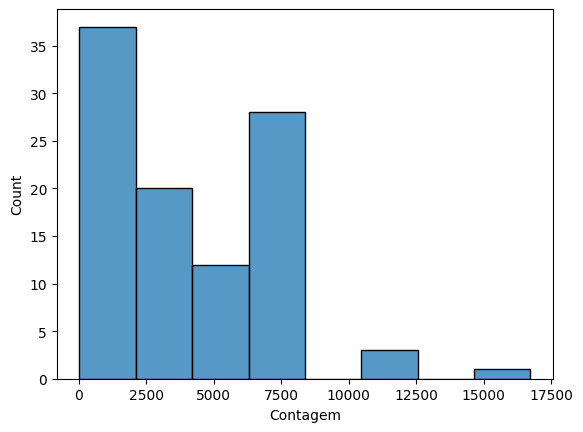

In [ ]:
# Histograma
import seaborn as sns
sns.histplot(data=contagem_fornecedores, x="Contagem")

Vemos que a distribuição de fornecedores é um pouco mais uniforme do que a de escolas. Ainda observamos outliers, como o fornecedor "RIO OFFICE COMÉRCIO DE MOVEIS E EQUIPAMENTOS", que possui mais de 16.700 registros na base, enquanto outros possuem menos de 50.

Lógica para evidenciar a quantidade de entregas de uma fornecedora com cada Escola.

In [ ]:
pivot_table_count = data_clean.pivot_table(values='Avaliação', index='CIE', columns='Fornecedor', aggfunc='count')
pivot_table_count.head()

Fornecedor,"CONHECIMENTO E INFORMAÇÃO S/A""","IMPORTACAO E EXPORTACAO LTDA""","PEÇAS E SERV.""",ADTK ATACADO IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTOS E,AGEM TECNOLOGIA E COMERCIO LTDA,AGUAMAR TRANSPORTES LTDA,AIDC TECNOLOGIA LTDA,ALLERBEST COMERCIO DE PRODUTOS PARA LABORATORIO LT,AMBY SERVICE LTDA,APLIQUIM EQUIPAMENTOS E PRODUTOS QUIMICOS LTDA-EPP,...,TORINO INFORMATICA LTDA.,TRAMPPO COMÉRCIO E RECICLAGEM DE PRODUTOS INDUSTRIAIS LTDA.,TSW COMÉRCIO DE MÓVEIS LTDA.,TZAR SL TRANSPORTE E ARMAZENAGEM LTDA.,UNENTEL SOLUCOES TECNOLOGICAS LTDA,VECTOR MOVEIS CORPORATIVOS LTDA.,VENTISOL INDÚSTRIA E COMÉRCIO S.A.,WEBLABOR SÃO PAULO MATERIAIS DIDÁTICOS LTDA - EPP,WELLINGTON SCARPARO BOTARO ME,XP ON CONSULTORIA LTDA
CIE,,,,,,,,,,,,,,,,,,,,,
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
59.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


Lógica para calcular a nota média de cada Fornecedora com cada Escola.

In [ ]:
pivot_table_mean = data_clean.pivot_table(values='Avaliação', index='CIE', columns='Fornecedor', aggfunc='mean')
pivot_table_mean.head()

Fornecedor,"CONHECIMENTO E INFORMAÇÃO S/A""","IMPORTACAO E EXPORTACAO LTDA""","PEÇAS E SERV.""",ADTK ATACADO IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTOS E,AGEM TECNOLOGIA E COMERCIO LTDA,AGUAMAR TRANSPORTES LTDA,AIDC TECNOLOGIA LTDA,ALLERBEST COMERCIO DE PRODUTOS PARA LABORATORIO LT,AMBY SERVICE LTDA,APLIQUIM EQUIPAMENTOS E PRODUTOS QUIMICOS LTDA-EPP,...,TORINO INFORMATICA LTDA.,TRAMPPO COMÉRCIO E RECICLAGEM DE PRODUTOS INDUSTRIAIS LTDA.,TSW COMÉRCIO DE MÓVEIS LTDA.,TZAR SL TRANSPORTE E ARMAZENAGEM LTDA.,UNENTEL SOLUCOES TECNOLOGICAS LTDA,VECTOR MOVEIS CORPORATIVOS LTDA.,VENTISOL INDÚSTRIA E COMÉRCIO S.A.,WEBLABOR SÃO PAULO MATERIAIS DIDÁTICOS LTDA - EPP,WELLINGTON SCARPARO BOTARO ME,XP ON CONSULTORIA LTDA
CIE,,,,,,,,,,,,,,,,,,,,,
12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
59.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN
